In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import time
import sys
import os

import seaborn as sns
import gensim 
from collections import Counter
from operator import itemgetter

In [2]:
import django
import platform

if platform.node() == "mcc-apsis":
    sys.path.append('/home/leey/tmv/BasicBrowser/')
else:
    # local paths
    sys.path.append('/Documents/Data/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

# import from appended path
import parliament.models as pm
from parliament.tasks import do_search, run_tm
import cities.models as cmodels
from django.contrib.auth.models import User
from tmv_app.models import *
from utils.tm_mgmt import update_topic_scores
from utils.text import *
from django.db.models import Q, Count, Func, F, Sum, Avg, Value as V

In [3]:
user1, created =  User.objects.get_or_create(username='leey', email='lee@mcc-berlin.net')
print(user1)
user1.save()

leey


In [4]:
# simple search for utterances
par_search_tei, created = pm.Search.objects.get_or_create(
                title="Kohle tei utterance",
                text="kohle",
                creator=user1,
                document_source="GermaParlTEI",
                search_object_type=2)
par_search_tei.save()
if created:
    print("doing search")
do_search(par_search_tei.id)
print(par_search_tei.par_count)
print(par_search_tei.utterance_count)
print(par_search_tei.runstats_set.all())

3281 utterances with search kohle
35275
3281
35275
3281
<QuerySet [<RunStats: RunStats object (1099)>, <RunStats: RunStats object (1069)>, <RunStats: RunStats object (1070)>, <RunStats: RunStats object (1100)>, <RunStats: RunStats object (1080)>, <RunStats: RunStats object (1101)>, <RunStats: RunStats object (1081)>, <RunStats: RunStats object (1062)>, <RunStats: RunStats object (1082)>, <RunStats: RunStats object (1061)>, <RunStats: RunStats object (1093)>, <RunStats: RunStats object (1094)>, <RunStats: RunStats object (1063)>, <RunStats: RunStats object (1083)>, <RunStats: RunStats object (1045)>, <RunStats: RunStats object (1095)>, <RunStats: RunStats object (1046)>, <RunStats: RunStats object (1084)>, <RunStats: RunStats object (1064)>, <RunStats: RunStats object (1071)>, '...(remaining elements truncated)...']>


In [3]:
# List of topics, LDA for K=10-70, steps =5
run_ids_ld = [1079, 1080, 1061, 1081, 1062, 1082, 1063, 1083, 1064, 1084, 1085, 1086, 1087]
run_ids_ld2 = [1093, 1094, 1061, 1095, 1062, 1096, 1063, 1097, 1064, 1098, 1099, 1100, 1101]

In [21]:
# LDA, K = 10
topics1 = Topic.objects.filter(run_id=run_ids_ld[0])

# LDA K = 10 for a different run
topics2 = Topic.objects.filter(run_id=run_ids_ld2[0])

In [4]:
# Testing other K values
topics3 = Topic.objects.filter(run_id=run_ids_ld[6])
topics4 = Topic.objects.filter(run_id=run_ids_ld[12])

### Simple Frequency Analysis

In [52]:
def get_frequency(run_id):
    topics = Topic.objects.filter(run_id=run_id)
    
    top_words_combined = []
    for tw in topics.values('top_words'):
        top_words_combined = top_words_combined + tw['top_words']
        
    word_count = Counter(top_words_combined)
    sorted_word_count = sorted(word_count.items(), key=itemgetter(1), reverse=True)

    return sorted_word_count, topics

In [61]:
freq1, topics1 = get_frequency(1079)

In [22]:
# adding all topics to single list 
top_words_combined = []
for tw in topics1.values('top_words'):
    top_words_combined = top_words_combined + tw['top_words']
# print(top_words_combined)    

In [25]:
# adding all topics to single list 
top_words_combined2 = []
for tw in topics2.values('top_words'):
    top_words_combined2 = top_words_combined2 + tw['top_words']
# print(top_words_combined)    

In [5]:
# adding all topics to single list 
top_words_combined3 = []
for tw in topics3.values('top_words'):
    top_words_combined3 = top_words_combined3 + tw['top_words']

top_words_combined4 = []
for tw in topics4.values('top_words'):
    top_words_combined4 = top_words_combined4 + tw['top_words']    

In [23]:
# run_id = 1079
stats1079 = RunStats.objects.get(run_id=1079)
word_count = Counter(top_words_combined)

print(stats1079.K, stats1079.alpha, stats1079.max_iter, stats1079.coherence)
print(word_count)
#for word, count in word_count.items():
#    print("{}: {}".format(word, count))

10 0.01 200 None
Counter({'jahr': 9, 'herr': 8, 'mehr': 6, 'deutschland': 5, 'prozent': 4, 'sag': 4, 'schon': 4, 'deutsch': 3, 'europa': 3, 'land': 3, 'neu': 3, 'frag': 3, 'energi': 3, 'ganz': 2, 'polit': 2, 'milliard': 2, 'bundesregier': 2, 'berat': 2, 'antrag': 2, 'wirtschaft': 1, 'frau': 1, 'gesagt': 1, 'heut': 1, 'mensch': 1, 'dafur': 1, 'haushalt': 1, 'euro': 1, 'gross': 1, 'gesetz': 1, 'kolleg': 1, 'erst': 1, 'klimaschutz': 1, 'erneuerbar': 1, 'ziel': 1, 'million': 1, 'unternehm': 1, 'bereich': 1, 'kohlekraftwerk': 1, 'energiew': 1, 'strom': 1, 'deshalb': 1, 'ausschuss': 1, 'drucksach': 1, 'abgeordnet': 1, 'fraktion': 1, 'beschlussempfehl': 1, 'wer': 1, 'enthalt': 1, 'stimmt': 1})


In [26]:
# run_id = 1093
stats1093 = RunStats.objects.get(run_id=1093)
word_count2 = Counter(top_words_combined2)

print(stats1093.K, stats1093.alpha, stats1093.max_iter, stats1093.coherence)
print(word_count2)
#print(list(word_count2.elements()))

10 0.01 200 0.144700699245963
Counter({'deutschland': 8, 'herr': 8, 'jahr': 8, 'sag': 6, 'mehr': 6, 'polit': 5, 'prozent': 4, 'land': 3, 'ganz': 3, 'neu': 3, 'europa': 2, 'frag': 2, 'bundesregier': 2, 'euro': 2, 'milliard': 2, 'energi': 2, 'schon': 2, 'heut': 2, 'deutsch': 1, 'union': 1, 'million': 1, 'umweltpolit': 1, 'klimaschutz': 1, 'ziel': 1, 'international': 1, 'arbeitsplatz': 1, 'gesetzentwurf': 1, 'fdp': 1, 'bereich': 1, 'erneuerbar': 1, 'strom': 1, 'kernenergi': 1, 'ausschuss': 1, 'drucksach': 1, 'berat': 1, 'abgeordnet': 1, 'beschlussempfehl': 1, 'fraktion': 1, 'wer': 1, 'antrag': 1, 'enthalt': 1, 'stimmt': 1, 'mensch': 1, 'sozial': 1, 'haushalt': 1, 'geht': 1, 'gross': 1, 'gut': 1})


In [17]:
# K = 40 and 70, run_id = 1063, 1087

stats1063 = RunStats.objects.get(run_id=1063)
word_count3 = Counter(top_words_combined3)

stats1087 = RunStats.objects.get(run_id=1087)
word_count4 = Counter(top_words_combined4)

#print(stats1063.K, stats1063.alpha, stats1063.max_iter, stats1063.coherence)
#print(word_count3)

#print(stats1087.K, stats1087.alpha, stats1087.max_iter, stats1087.coherence)
#print(word_count4)

In [10]:
# Compare topics when alpha is varied
# K = 30, alpha = 0.005, 0.01, 0.05
run_ids_alpha = [1109, 1062, 1108]

topics_a1 = Topic.objects.filter(run_id=run_ids_alpha[0])
topics_a2= Topic.objects.filter(run_id=run_ids_alpha[1])
topics_a3 = Topic.objects.filter(run_id=run_ids_alpha[2])

In [11]:
top_words_combined_a1 = []
for tw in topics_a1.values('top_words'):
    top_words_combined_a1 = top_words_combined_a1 + tw['top_words']
    
top_words_combined_a2 = []
for tw in topics_a2.values('top_words'):
    top_words_combined_a2 = top_words_combined_a2 + tw['top_words']
    
top_words_combined_a3 = []
for tw in topics_a3.values('top_words'):
    top_words_combined_a3 = top_words_combined_a3 + tw['top_words']

In [18]:
stats1109 = RunStats.objects.get(run_id=1109)
word_count_a1 = Counter(top_words_combined_a1)

stats1062 = RunStats.objects.get(run_id=1087)
word_count_a2 = Counter(top_words_combined_a2)

stats1108 = RunStats.objects.get(run_id=1108)
word_count_a3 = Counter(top_words_combined_a3)


#print("alpha = {}".format(stats1109.alpha), word_count_a1)
#print("alpha = {}".format(stats1062.alpha), word_count_a2)
#print("alpha = {}".format(stats1108.alpha), word_count_a3)

### Frequency Metric

share = n/K
n = no. of times a word appears in topics within one run
K = number of topics
share = 1 means word appears in every single topic 

score = (n-1)/(K-1) # for each word

can use score to get mean score for each topic within a topic model, and also overall mean score of individual words 

In [27]:
word_count_list = word_count.items()
word_count_list2 = word_count2.items()
word_count_list3 = word_count3.items()
word_count_list4 = word_count4.items()

In [55]:
def get_word_score(run_id):
    stat = RunStats.objects.get(run_id=run_id)
    K = stat.K
    
    freq, topics = get_frequency(run_id=run_id)
    word_count_list = word_count.items()
    
    score_dict = {}
    for word, count in word_count_list:
        word_share = count/K
        word_score = (count - 1)/(K-1)
        score_dict[word] = word_score
    
    # find mean score of each topic in one topic model
    # adding topics to list by topic
    sigma_mws = []
    sigma_ttw = []
    for topic in topics.values('top_words'):
        total_word_score = []
        ttw = []
        
        for word in topic['top_words']:
            wws = score_dict[word]
            total_word_score = total_word_score + [wws]
            ttw = ttw + [word]
    
        mean_word_score = sum(total_word_score)/K
        sigma_mws = sigma_mws + [mean_word_score]
        sigma_ttw = sigma_ttw + [ttw]
    
    return sigma_mws, sigma_ttw

In [60]:
mws1, ttw1 = get_word_score(1079)

mws1_df = pd.DataFrame(data=ttw1)
mws1_df['mws'] = mws1

In [57]:
# word_score
K = 10
score_dict = {}
for word, count in word_count_list:
    word_share = count/K
    word_score = (count - 1)/(K-1)
    score_dict[word] = word_score
    #print(word, word_score)

In [58]:
# find mean score of each topic in one topic model
# LDA, K = 10, run_id = 1079

sigma_mws = []

for topic in topics1.values('top_words'):
    total_word_score = []
    for word in topic['top_words']:
        wws = score_dict[word]
        total_word_score = total_word_score + [wws]
    
    mean_word_score = sum(total_word_score)/K
    sigma_mws = sigma_mws + [mean_word_score]
    #print(mean_word_score)

In [107]:
# adding topics to list by topic
sigma_ttw = []
for topic in topics1.values('top_words'):
    ttw = []
    for tw in topic['top_words']:
        ttw = ttw + [tw]
    sigma_ttw = sigma_ttw + [ttw]
    print(ttw)

['jahr', 'herr', 'prozent', 'deutschland', 'sag', 'wirtschaft', 'deutsch', 'ganz', 'polit', 'europa']
['herr', 'sag', 'land', 'mehr', 'frau', 'gesagt', 'heut', 'jahr', 'ganz', 'schon']
['europa', 'land', 'deutschland', 'mehr', 'jahr', 'mensch', 'deutsch', 'herr', 'dafur', 'sag']
['jahr', 'herr', 'haushalt', 'milliard', 'euro', 'mehr', 'deutschland', 'polit', 'prozent', 'gross']
['bundesregier', 'herr', 'gesetz', 'jahr', 'kolleg', 'berat', 'erst', 'antrag', 'neu', 'frag']
['klimaschutz', 'energi', 'erneuerbar', 'prozent', 'deutschland', 'jahr', 'herr', 'ziel', 'sag', 'schon']
['jahr', 'neu', 'mehr', 'herr', 'million', 'schon', 'unternehm', 'prozent', 'milliard', 'bereich']
['herr', 'energi', 'jahr', 'mehr', 'kohlekraftwerk', 'frag', 'energiew', 'schon', 'strom', 'bundesregier']
['energi', 'deutschland', 'land', 'frag', 'jahr', 'neu', 'mehr', 'deshalb', 'deutsch', 'europa']
['ausschuss', 'drucksach', 'berat', 'abgeordnet', 'fraktion', 'beschlussempfehl', 'antrag', 'wer', 'enthalt', 'stim

In [145]:
# mean word score across all topics
m_mws = sum(sigma_mws)/10
m_mws

0.2911111111111112

In [144]:
mws_df = pd.DataFrame(data=sigma_ttw)
mws_df['mws'] = sigma_mws
#mws_df

### Plots

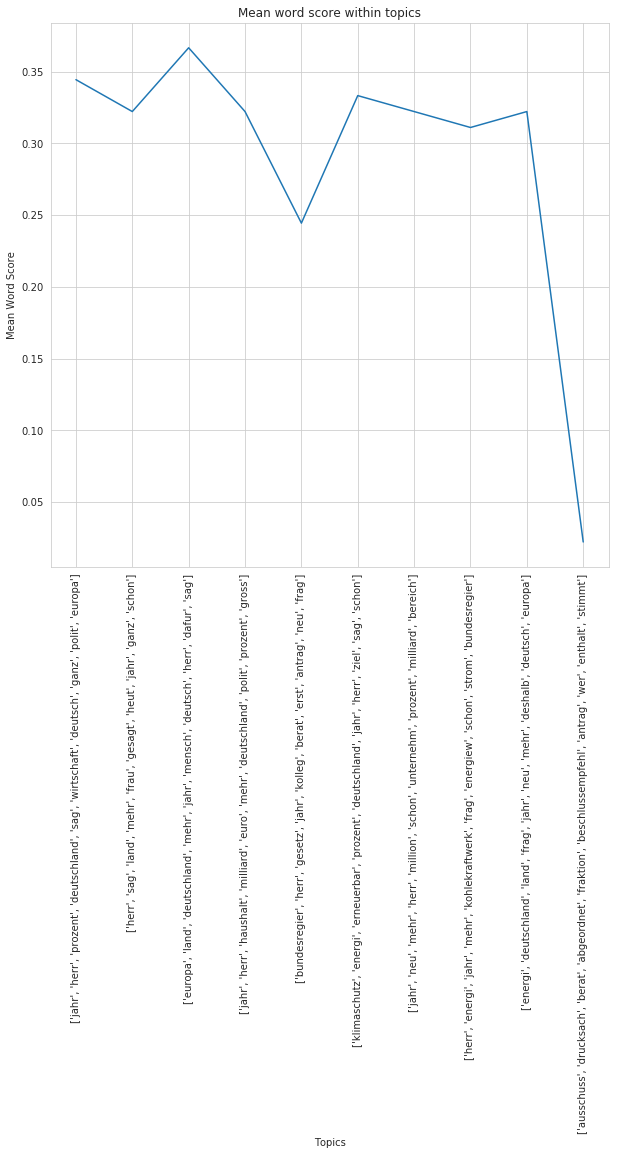

In [143]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,10))

sns.lineplot(data=mws_df['mws'], ax = ax)

plt.xticks(np.arange(len(sigma_ttw)), [ttw for ttw in sigma_ttw], rotation='vertical', fontsize=10)

ax.set(xlabel="Topics",ylabel="Mean Word Score", title="Mean word score within topics")
plt.show()